In [34]:
import os
import sys
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Data = pd.read_csv('Desktop/Assi 1.csv')

In [52]:
Data

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,12/12/2015,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,12/12/2015,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,12/1/2014,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,12/1/2014,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,12/1/2014,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,11/20/2015,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692
9989,US-2017-105998,11/3/2017,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.8900
9990,US-2017-105998,11/3/2017,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.9148
9991,US-2014-148194,5/4/2014,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.8976


In [4]:
Data.columns.values

array(['Order ID', 'Order Date', 'Ship Mode', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'], dtype=object)

# UNIVARIATE ANALYSIS

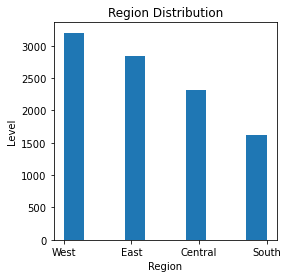

In [5]:
plt.figure(figsize=(4,4))
plt.hist(Data['Region'], bins=10)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Level')
plt.show()

South has the least sales so items with the least sale needs to be reduced whiles items with high sales need to be increased or maintained. This should apply to all regions. And items should not be equally distributed to all regions, but distributed based on how frequent they are purchased.  

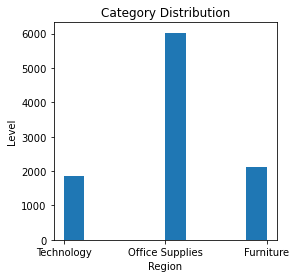

In [6]:
plt.figure(figsize=(4,4))
plt.hist(Data['Category'], bins=10)
plt.title('Category Distribution')
plt.xlabel('Region')
plt.ylabel('Level')
plt.show()

Office supplies have high patronage and therefore needs to maintiain it production number or increase  whiles product of Technology and Furniture are to be reduced due to its low patronage. However the reduction and increaseing of products needs to be done according to region. 

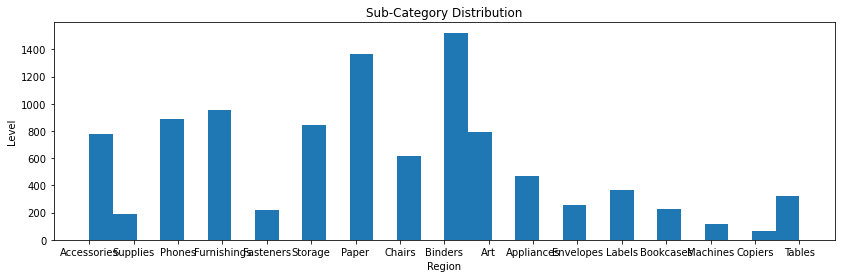

In [8]:
plt.figure(figsize=(14,4))
plt.hist(Data['Sub-Category'], bins=30)
plt.title('Sub-Category Distribution')
plt.xlabel('Region')
plt.ylabel('Level')
plt.show()

With this graph, items that are least purchased are shown and this will help determine what items needs to be stocked the most and which items needs to be stocked the least according to regions. Items that are highly purchased might be what is really needed in that region and so stocking should follow such principle. 

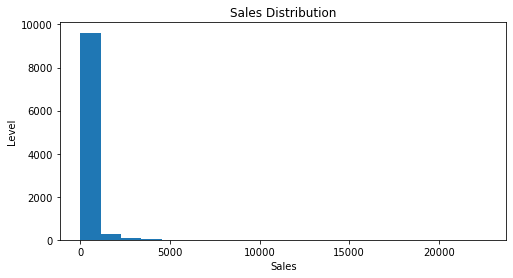

In [12]:
plt.figure(figsize=(8,4))
plt.hist(Data['Sales'], bins=20)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Level')
plt.show()

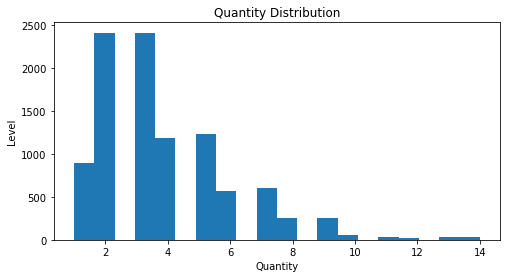

In [21]:
plt.figure(figsize=(8,4))
plt.hist(Data['Quantity'],bins=20)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Level')
plt.show()

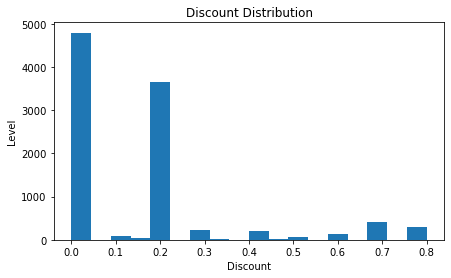

In [29]:
plt.figure(figsize=(7,4))
plt.hist(Data['Discount'],bins=18)
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Level')
plt.show()

# MULTIVARIATE ANALYSIS

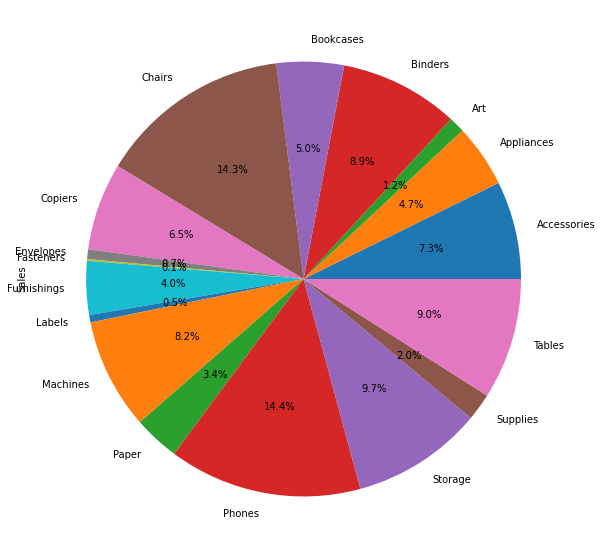

In [39]:
Data.groupby('Sub-Category')['Sales'].sum().plot(kind='pie', figsize=(10,10), fontsize=10, autopct='%1.1f%%')
plt.show()

This graph just shows what to invest in the most and what to invest in the least. 

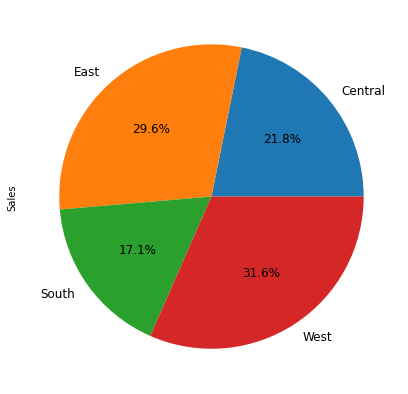

In [33]:
Data.groupby('Region')['Sales'].sum().plot(kind='pie', figsize=(7,7), fontsize=12, autopct='%1.1f%%')
plt.show()

This shows which region sells more of the products that where equally distributed and how distribution should be done. 

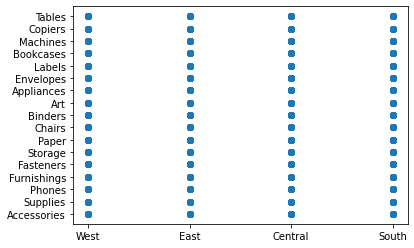

In [71]:
plt.scatter(Data['Region'], Data['Sub-Category'])
plt.show()

In [72]:
Data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200794,-0.028187,0.414750
Quantity,0.200794,1.000000,0.008630,0.063334
Discount,-0.028187,0.008630,1.000000,-0.228720
Profit,0.414750,0.063334,-0.228720,1.000000


I dont understand what i am seeing. 